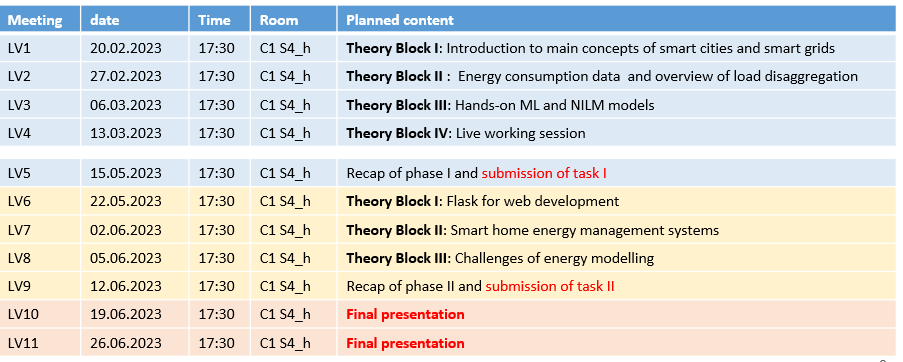

In [31]:
from IPython.display import Image
Image(filename='embedded_images/deadlines.png')

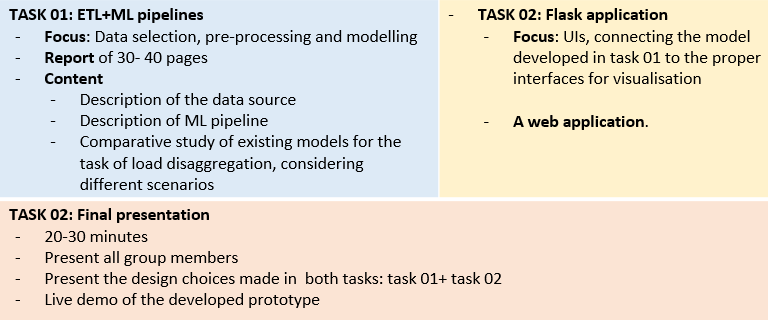

In [32]:
Image(filename='embedded_images/task_overview.png')

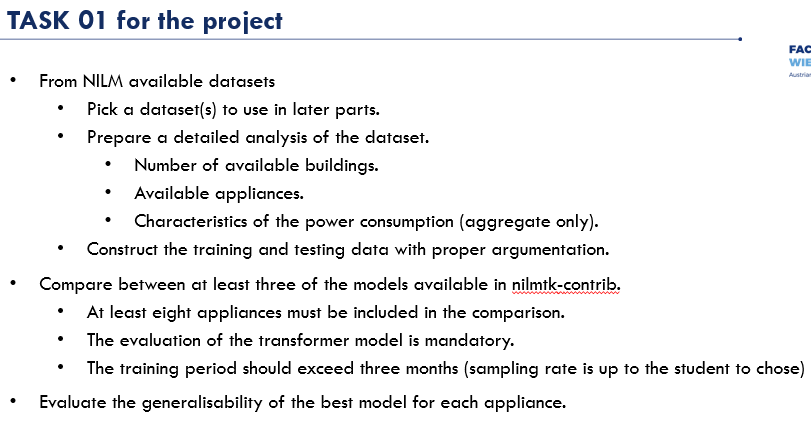

In [33]:
Image(filename='embedded_images/task_01.png')


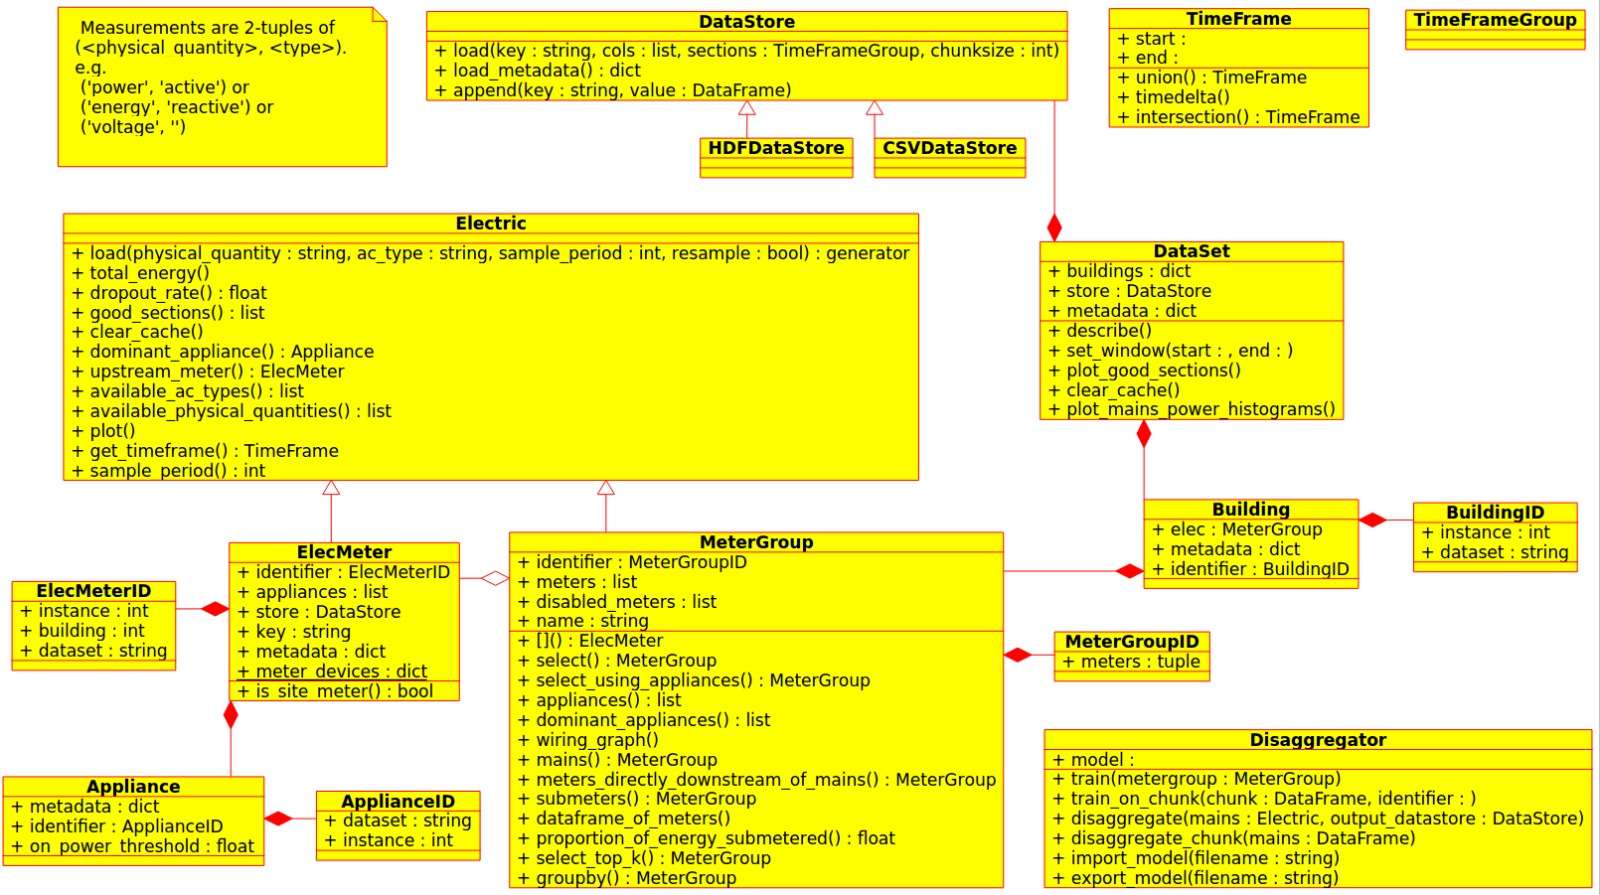

In [34]:
Image(filename='embedded_images/dataset_structure.jpeg')

In [35]:
# IDEAS
# check other datasets than ukdale for common appliances
# process data in year to year bases -> otherwise pc RIP, not enough RAM

# QEUSTIONS
# why some elecMeters multiple appliances? ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
# multiple instances of appliances

In [36]:
# Load Dataset
from nilmtk import DataSet

ukdale = DataSet("ukdale2.h5")
#{'start': '2012-11-09T22:28:15+00:00', 'end': '2017-04-26T18:35:53+01:00'}
ukdale.set_window(start='2015-01-01', end='2015-04-01')
ukdale.load(sample_period=10)

In [37]:
# Get all appliances out of all buildings
arr = []

for j in range(len(ukdale.buildings)):
    arr2 = []
    for i in range(len(ukdale.buildings[j+1].elec.appliances)):
        arr2.append(ukdale.buildings[1].elec.appliances[i].type["type"])
    arr.append(arr2)
print(arr)

[['solar thermal pumping station', 'audio system', 'breadmaker', 'kettle', 'dish washer', 'laptop computer', 'audio amplifier', 'food processor', 'radio', 'light', 'light', 'light', 'light', 'washer dryer', 'coffee maker', 'mobile phone charger', 'baby monitor', 'light', 'water pump', 'charger', 'drill', 'toasted sandwich maker', 'oven', 'HTPC', 'vacuum cleaner', 'tablet computer charger', 'desktop computer', 'immersion heater', 'security alarm', 'hair dryer', 'computer', 'food processor', 'television', 'bouncy castle pump', 'radio', 'laptop computer', 'computer monitor', 'broadband router', 'light', 'external hard disk', 'fan', 'light', 'microwave', 'soldering iron', 'light', 'boiler', 'light', 'hair straighteners', 'light', 'mobile phone charger', 'fridge freezer', 'audio system', 'kitchen aid', 'USB hub', 'wireless phone charger', 'active subwoofer', 'ethernet switch', 'light', 'radio', 'broadband router', 'clothes iron', 'laptop computer', 'fan', 'light', 'toaster', 'light', 'light

In [38]:
# buildings: 1, 2, 5 with common appliances -> 3, 4 not enough appliances
common_apps = set(arr[0]).intersection(arr[1], arr[4])
print(common_apps)

{'audio system', 'food processor', 'kettle', 'solar thermal pumping station', 'radio', 'dish washer', 'light', 'breadmaker', 'audio amplifier', 'laptop computer', 'mobile phone charger', 'washer dryer', 'baby monitor', 'coffee maker'}


In [39]:
# Get all ElectricMeters
ukdale.buildings[1].elec

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1), Appliance(type='washer dryer', instance=2)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances

In [40]:
#ukdale.buildings[1].elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


C:\Users\david\Desktop\smart_meter_predictions\nilmtk\nilmtk\preprocessing\clip.py:49: RuntimeWarning: No measurement limits for ('voltage', '').
  warn('No measurement limits for {}.'.format(measurement), RuntimeWarning)


KeyboardInterrupt: 

In [41]:
ukdale.buildings[1].elec.submeters().energy_per_meter()

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

,"(2, 1, UK-DALE)","(3, 1, UK-DALE)","(4, 1, UK-DALE)","(5, 1, UK-DALE)","(6, 1, UK-DALE)","(7, 1, UK-DALE)","(8, 1, UK-DALE)","(9, 1, UK-DALE)","(10, 1, UK-DALE)","(11, 1, UK-DALE)",...,"(44, 1, UK-DALE)","(45, 1, UK-DALE)","(46, 1, UK-DALE)","(47, 1, UK-DALE)","(48, 1, UK-DALE)","(49, 1, UK-DALE)","(50, 1, UK-DALE)","(51, 1, UK-DALE)","(52, 1, UK-DALE)","(53, 1, UK-DALE)"
active,NaN,NaN,8.144574,98.054378,54.312249,27.224516,NaN,35.792296,46.364646,15.201203,...,0.046305,0.720664,0.008637,1.10413,1.64643,2.176022,1.38658,6.491979,NaN,0.893653
apparent,64.999029,15.407094,NaN,NaN,NaN,NaN,66.310359,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

C:\Users\david\Desktop\smart_meter_predictions\nilmtk\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


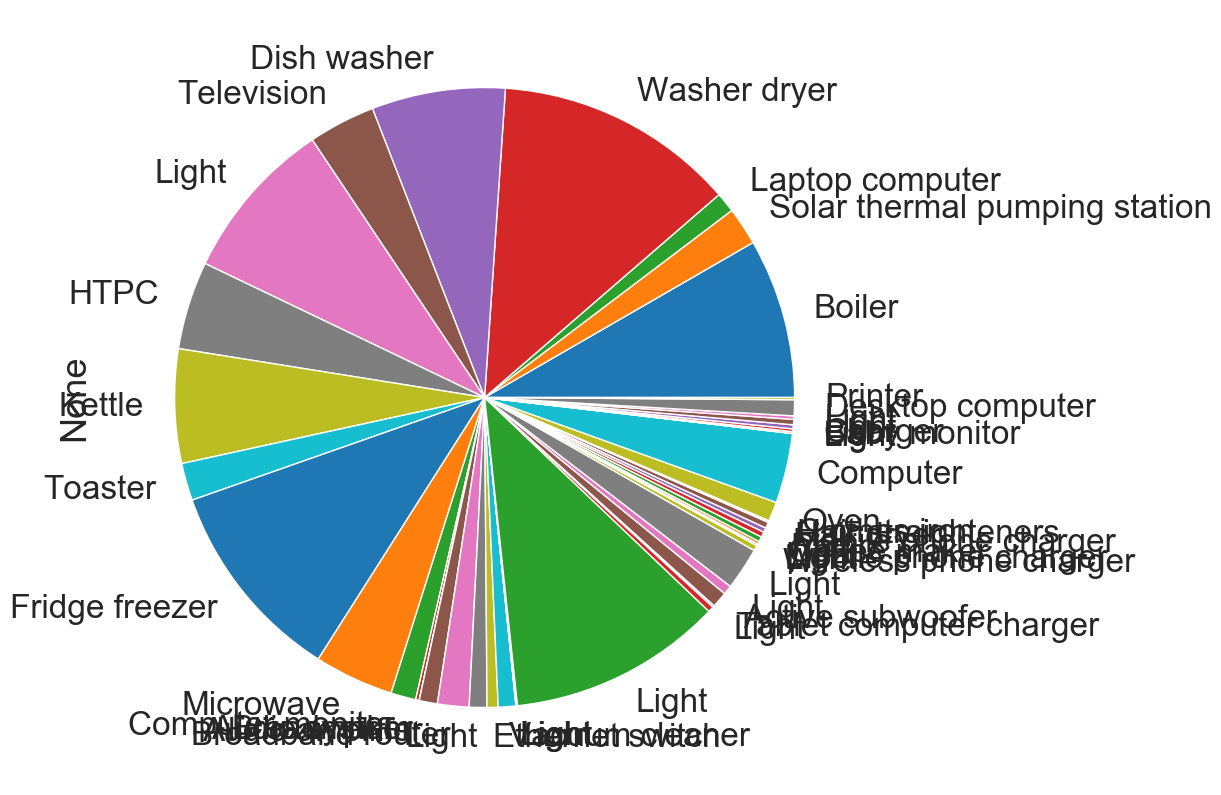

In [42]:
fraction = ukdale.buildings[1].elec.submeters().fraction_per_meter().dropna()
# Create convenient labels
labels = ukdale.buildings[1].elec.get_labels(fraction.index)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels)

In [43]:
#Get microwave data -> target time series
df_microwave =next(ukdale.buildings[1].elec["microwave"].load(sample_period=10))
microwave_df = df_microwave.unstack()["power"]["active"]
microwave_df

2015-01-01 00:00:00+00:00    1.0
2015-01-01 00:00:10+00:00    1.0
2015-01-01 00:00:20+00:00    1.0
2015-01-01 00:00:30+00:00    1.0
2015-01-01 00:00:40+00:00    1.0
                            ... 
2015-03-31 23:59:10+01:00    1.0
2015-03-31 23:59:20+01:00    1.0
2015-03-31 23:59:30+01:00    1.0
2015-03-31 23:59:40+01:00    1.0
2015-03-31 23:59:50+01:00    1.0
Freq: 10S, Length: 777240, dtype: float32

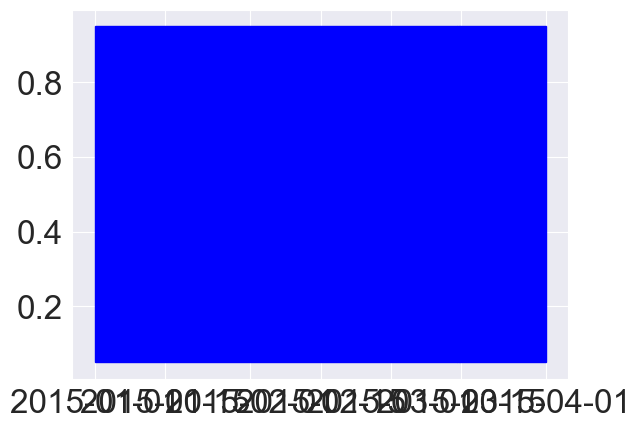

In [44]:
ukdale.buildings[1].elec["microwave"].good_sections(full_results=True).plot()

In [45]:
# Get aggregate of building -> feature time series
df_aggregate =next(ukdale.buildings[1].elec.mains().load(sample_period=10))

C:\Users\david\Desktop\smart_meter_predictions\nilmtk\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")


In [46]:
apparent_power_df = df_aggregate.unstack()["power"]["apparent"]
active_power_df = df_aggregate.unstack()["power"]["active"]
active_power_df

2015-01-01 00:00:00+00:00    139.268997
2015-01-01 00:00:10+00:00    139.268005
2015-01-01 00:00:20+00:00    139.240997
2015-01-01 00:00:30+00:00    139.207993
2015-01-01 00:00:40+00:00    139.272995
                                ...    
2015-03-31 23:59:10+01:00    599.460999
2015-03-31 23:59:20+01:00    600.695984
2015-03-31 23:59:30+01:00    600.908020
2015-03-31 23:59:40+01:00    601.567993
2015-03-31 23:59:50+01:00    601.098999
Freq: 10S, Length: 777240, dtype: float32

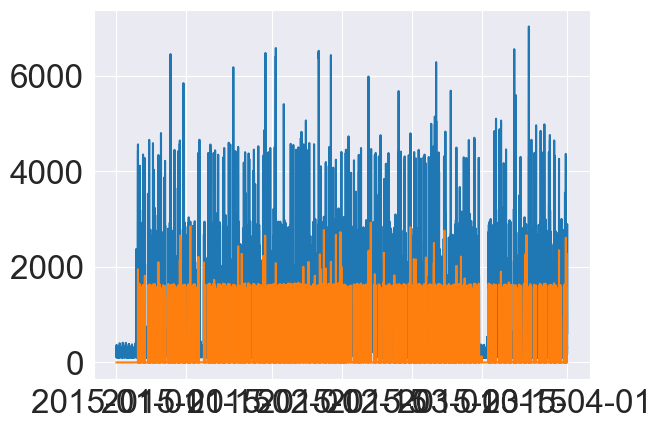

<Figure size 2000x600 with 0 Axes>

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(active_power_df)
#sns.lineplot(apparent_power_df)
sns.lineplot(microwave_df)
plt.figure(figsize=(20, 6))
plt.show()

In [48]:
# Normalize values
def normalise(df):
    mean = df.fillna(method='ffill').values.mean()
    std = df.fillna(method = 'ffill').values.std()
    return mean, std, (df.fillna(method='ffill').values-mean)/std

mean_agg, std_agg, aggregate = normalise(active_power_df)
mean_mcw, std_mcw, microwave = normalise(microwave_df)

microwave.shape, aggregate.shape

((777240,), (777240,))

In [49]:
# Sliding window (sequence to sequence)
# Padding is done here, note other approaches for the padding can be used
import numpy as np
WINDOW_SIZE = 99
aggregate = np.pad(aggregate, (WINDOW_SIZE//2, WINDOW_SIZE//2 +1))
microwave = np.pad(microwave.reshape(-1), (WINDOW_SIZE//2, WINDOW_SIZE//2 +1))

In [50]:
aggregate = np.array([
    aggregate[i:i+WINDOW_SIZE] for i in range(len(aggregate)-WINDOW_SIZE)
])
aggregate.shape

(777240, 99)

In [51]:
microwave = np.array([
    microwave[i:i+WINDOW_SIZE] for i in range(len(microwave)-WINDOW_SIZE)
])
microwave.shape

(777240, 99)

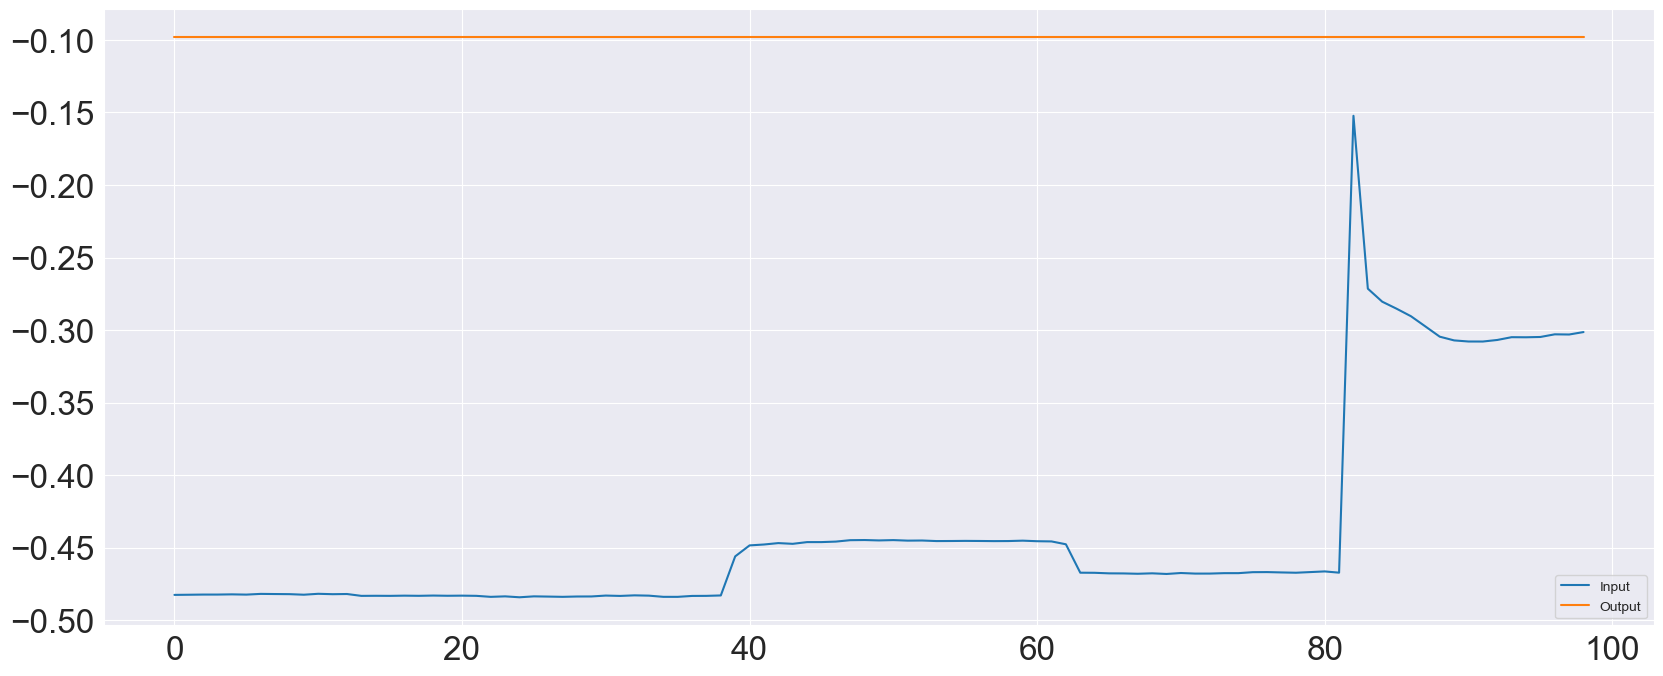

In [52]:
# Print some random sequences to test
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.font_manager
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)

index = 70
input_seq = aggregate[index]
output_seq = microwave[index]
figure(figsize=(20,8))
plt.plot(input_seq, label='Input')
plt.plot(output_seq, label='Output')
plt.legend()
plt.show()

In [53]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense
def return_seq2seq(sequence_length):
    model = Sequential()
    # 1D Conv
    model.add(Conv1D(30,10,activation="relu",input_shape=(sequence_length,1),strides=2))
    model.add(Conv1D(30, 8, activation='relu', strides=2))
    model.add(Conv1D(40, 6, activation='relu', strides=1))
    model.add(Conv1D(50, 5, activation='relu', strides=1))
    model.add(Dropout(.2))
    model.add(Conv1D(50, 5, activation='relu', strides=1))
    model.add(Dropout(.2))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(sequence_length))
    optim = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='mse', optimizer=optim)
    return model

microwave_model = return_seq2seq(WINDOW_SIZE)

In [54]:
microwave_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 45, 30)            330       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 19, 30)            7230      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 14, 40)            7240      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 10, 50)            10050     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 6, 50)             12550     
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 50)            

In [55]:
aggregate = np.expand_dims(aggregate, axis=-1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(aggregate, microwave, test_size=.2, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((621792, 99, 1), (155448, 99, 1), (621792, 99), (155448, 99))

In [57]:
X_train.shape, y_train.shape

((621792, 99, 1), (621792, 99))

In [58]:
np.isnan(X_train).sum(), np.isnan(y_train).sum()

(0, 0)

In [59]:
history = microwave_model.fit(X_train, y_train, validation_split=.15, batch_size=64, epochs=100, shuffle=True)

Epoch 1/100
8259/8259 [==============================] - 42s 5ms/step - loss: 0.8466 - val_loss: 0.7633
Epoch 2/100
8259/8259 [==============================] - 44s 5ms/step - loss: 0.6204 - val_loss: 0.6297
Epoch 3/100
8259/8259 [==============================] - 43s 5ms/step - loss: 0.5035 - val_loss: 0.5508
Epoch 4/100
8259/8259 [==============================] - 42s 5ms/step - loss: 0.4360 - val_loss: 0.5297
Epoch 5/100
8259/8259 [==============================] - 42s 5ms/step - loss: 0.3904 - val_loss: 0.4957
Epoch 6/100
8259/8259 [==============================] - 43s 5ms/step - loss: 0.3665 - val_loss: 0.4934
Epoch 7/100
8259/8259 [==============================] - 43s 5ms/step - loss: 0.3388 - val_loss: 0.4843
Epoch 8/100
8259/8259 [==============================] - 42s 5ms/step - loss: 0.3224 - val_loss: 0.4637
Epoch 9/100
8259/8259 [==============================] - 42s 5ms/step - loss: 0.3077 - val_loss: 0.4542
Epoch 10/100
8259/8259 [==============================] - 43s 5m

[]

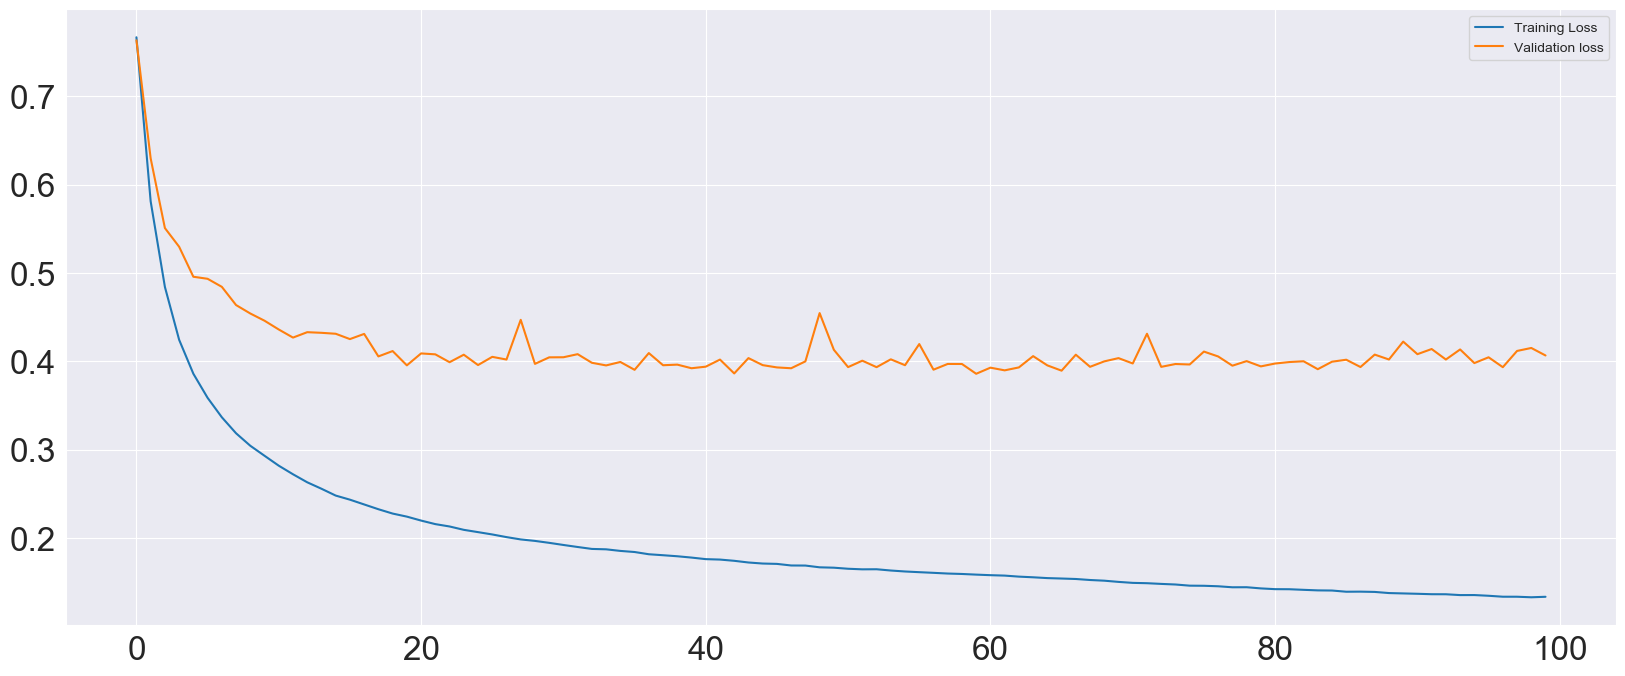

In [60]:
#tf.config.list_physical_devices('GPU') -> https://stackoverflow.com/questions/58956619/tensorflow-2-0-list-physical-devices-doesnt-detect-my-gpu
figure(figsize=(20,8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.plot()

In [61]:
y_predict = microwave_model.predict(X_test)

In [62]:
y_predict.shape

(155448, 99)

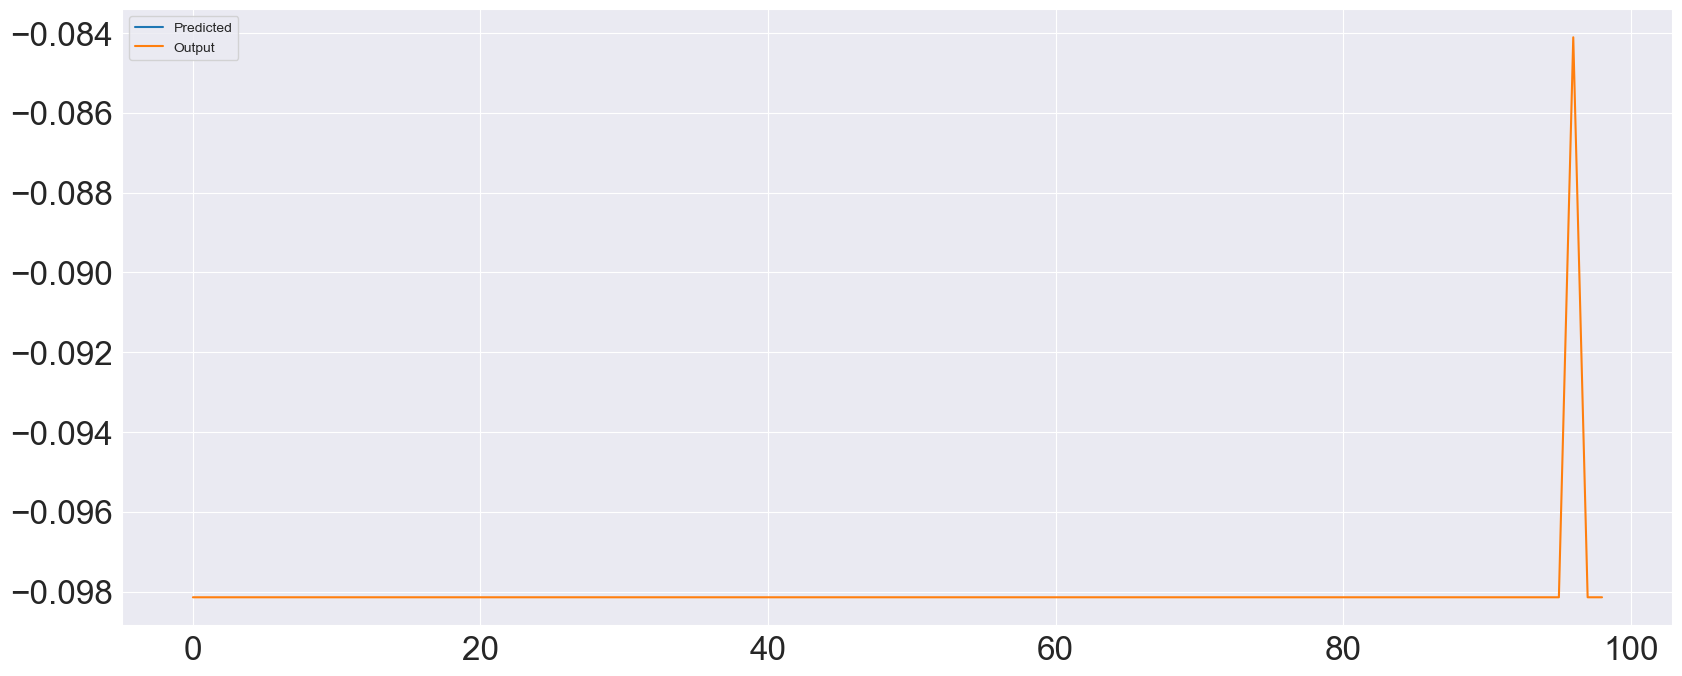

In [73]:
index = 150
predicted_seq = y_predict[index]
real_seq = y_test[index]
figure(figsize=(20,8))
plt.plot(predicted_seq, label='Predicted')
plt.plot(real_seq, label='Output')
plt.legend()
plt.show()

In [64]:
def denormlise(array, mean, std):
    return array*std+mean

def aggregate_sequences(prediction):
    l = WINDOW_SIZE
    n = len(prediction) + l - 1
    sum_arr = np.zeros((n))
    counts_arr = np.zeros((n))
    o = len(sum_arr)
    for i in range(len(prediction)):
        sum_arr[i:i + l] += prediction[i].flatten()
    counts_arr[i:i + l] += 1
    for i in range(len(sum_arr)):
        sum_arr[i] = sum_arr[i] / counts_arr[i]
    return denormlise(sum_arr, mean_mcw, std_mcw)
y_predict = aggregate_sequences(y_predict)
y_real = aggregate_sequences(y_test)

C:\Users\david\AppData\Local\Temp\ipykernel_5164\1619913380.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  sum_arr[i] = sum_arr[i] / counts_arr[i]


[]

C:\Users\david\.conda\envs\smart-meter-predictions\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


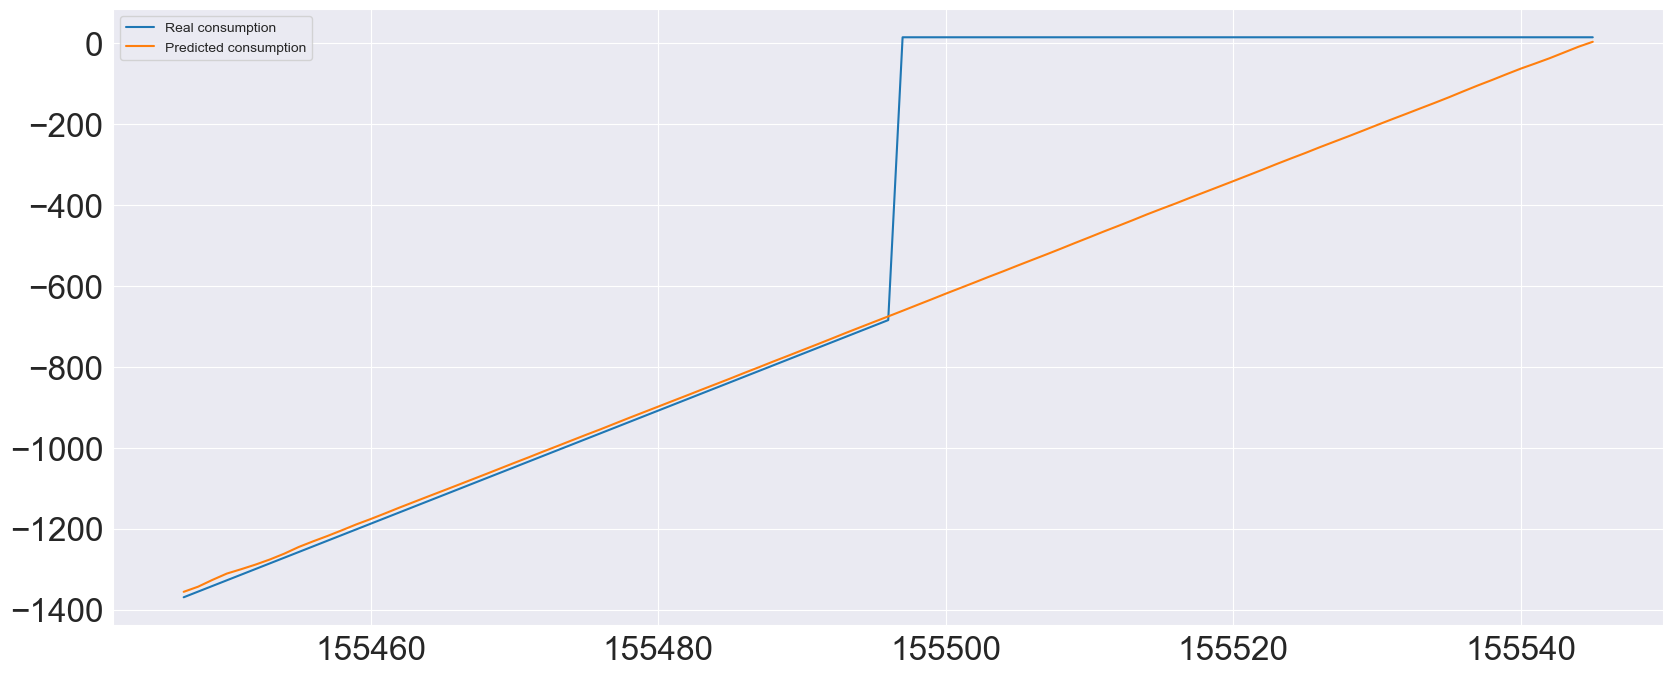

In [65]:
figure(figsize=(20,8))
plt.plot(y_real, label='Real consumption')
plt.plot(y_predict, label='Predicted consumption')
plt.legend()
plt.plot()

[]

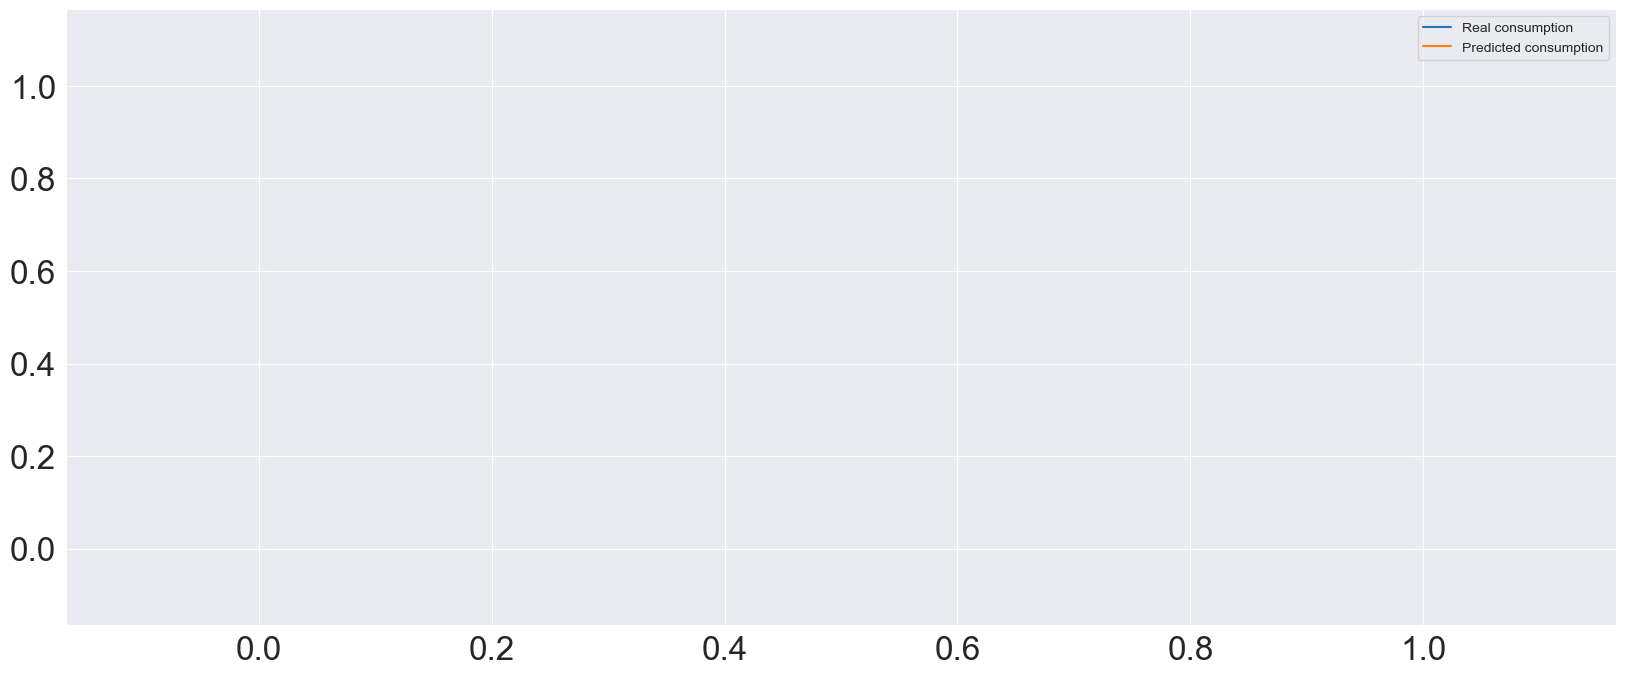

In [66]:
figure(figsize=(20,8))
plt.plot(y_real[:5000], label='Real consumption')
plt.plot(y_predict[:5000], label='Predicted consumption')
plt.legend()
plt.plot()

In [67]:
from nilmtk.losses import nde, mae, f1score
print(f"""
- F1-score: {f1score(y_real, y_predict)}
- NDE: {nde(y_real, y_predict)}
- MAE: {mae(y_real, y_predict)}
""")

C:\Users\david\Desktop\smart_meter_predictions\nilmtk\nilmtk\losses.py:32: RuntimeWarning: invalid value encountered in subtract
  numerator = np.sum((app_gt-app_pred)**2)
C:\Users\david\.conda\envs\smart-meter-predictions\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [21]:
from nilmtk.api import API
from nilmtk.disaggregate import Mean
from nilmtk_contrib.disaggregate import DAE,Seq2Point, Seq2Seq, RNN, WindowGRU

epochs = 1

redd = {
    'power': {
        'mains': ['apparent','active'],
        'appliance': ['apparent','active']
    },
    'sample_rate': 10,

    'appliances': ['microwave', 'dish washer', 'washer dryer', 'coffee maker'],
    'methods': {


        'RNN':RNN({'n_epochs':epochs,'batch_size':32}),
        'DAE':DAE({'n_epochs':epochs,'batch_size':32}),
        'Seq2Point':Seq2Point({'n_epochs':epochs,'batch_size':32}),
        'Seq2Seq':Seq2Seq({'n_epochs':epochs,'batch_size':32}),

        'Mean': Mean({}),

    },
    'train': {
        'datasets': {
            'Dataport': {
                'path': 'C:/Users/david/Desktop/smart_meter_predictions/ukdale2.h5',
                'buildings': {
                    1: {
                        'start_time': '2015-04-04',
                        'end_time': '2015-04-05'
                    },
                    #                 56: {
                    #             'start_time': '2015-01-28',
                    #             'end_time': '2015-01-30'
                    #           },
                }

            }
        }
    },
    'test': {
        'datasets': {
            'Datport': {
                'path': 'C:/Users/david/Desktop/smart_meter_predictions/ukdale2.h5',
                'buildings': {
                    1: {
                        'start_time': '2015-04-05',
                        'end_time': '2015-04-06'
                    },
                }
            }
        },
        'metrics':['mae']
    }
}

#'WindowGRU':WindowGRU({'n_epochs':50,'batch_size':32}),

In [22]:
api_res = API(redd)

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Generating predictions for : RNN
Generating predictions for : DAE
Generating predictions for : Seq2Point
Generating predictions for : Seq2Seq
Generating predictions for : Mean
............  mae  ..............
                   RNN       DAE  Seq2Point   Seq2Seq      Mean
microwave     0.029277  0.004188   0.033066  0.001463  0.001967
dish washer   0.048028  0.000720   0.000529  0.000025  0.000000
washer dryer  0.037494  0.000973   0.088326  0.000184  0.000232
coffee maker  0.325398  0.351091   0.415038  0.360719  0.360009
